In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
    # Read data into DataFrame from CSV file
    # cyclone_df = pd.read_csv("Cyclone_ML.csv")
    cyclone_df = pd.read_csv("../data/Cyclone_ML.csv")

    # Select features for machine learning and assign to X
    selected_features = cyclone_df[["SURFACE_CODE",	"CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD", "CENTRAL_INDEX (CI)", "WAVE_HEIGHT"]]
    X = selected_features

    # Set y to compass direction of cyclone based on wind direction degree
    y = cyclone_df["WIND_COMPASS"]
    # y = cyclone_df["MAX_REP_WIND_DIR"]
 

    print(X.shape, y.shape)

(1691, 8) (1691,)


In [9]:
cyclone_df

,NAME,TM,TYPE,DATA_SRC,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD,MAX_REP_WIND_DIR,WIND_COMPASS,CENTRAL_INDEX (CI),WAVE_HEIGHT
0,Annie,1973-11-22 06:00:00,T,2.0,1.0,20.0,-11.00,92.60,1001.0,12.9,100.0,E,2.064005,3.337484
1,Annie,1973-11-22 12:00:00,T,2.0,1.0,20.0,-11.10,93.10,1002.0,12.9,110.0,E,1.950454,3.093691
2,Annie,1973-11-23 00:01:00,T,2.0,1.0,20.0,-11.10,94.20,1003.0,12.9,160.0,S,1.829259,2.838769
3,Annie,1973-11-23 06:00:00,T,2.0,1.0,20.0,-11.10,94.60,1000.0,12.9,210.0,SW,2.171169,3.571799
4,Annie,1973-11-23 12:00:00,T,2.0,1.0,20.0,-11.20,95.00,1002.0,12.9,250.0,W,1.950454,3.093691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,George,2007-03-04 18:00:00,T,3.0,2.0,30.0,-14.30,126.40,986.0,20.6,270.0,W,3.306407,6.276868
1687,Carlos,2011-02-15 12:00:00,T,3.0,4.0,21.0,-12.73,130.61,999.0,20.6,350.0,N,2.272897,3.797903
1688,Carlos,2011-02-15 21:00:00,T,3.0,2.0,30.0,-12.54,130.72,993.0,18.0,210.0,SW,2.801605,5.026852
1689,Carlos,2011-02-16 00:00:00,T,3.0,2.0,30.0,-12.41,130.99,995.0,18.0,210.0,SW,2.638106,4.637562


In [10]:
X

,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD,CENTRAL_INDEX (CI),WAVE_HEIGHT
0,1.0,20.0,-11.00,92.60,1001.0,12.9,2.064005,3.337484
1,1.0,20.0,-11.10,93.10,1002.0,12.9,1.950454,3.093691
2,1.0,20.0,-11.10,94.20,1003.0,12.9,1.829259,2.838769
3,1.0,20.0,-11.10,94.60,1000.0,12.9,2.171169,3.571799
4,1.0,20.0,-11.20,95.00,1002.0,12.9,1.950454,3.093691
...,...,...,...,...,...,...,...,...
1686,2.0,30.0,-14.30,126.40,986.0,20.6,3.306407,6.276868
1687,4.0,21.0,-12.73,130.61,999.0,20.6,2.272897,3.797903
1688,2.0,30.0,-12.54,130.72,993.0,18.0,2.801605,5.026852
1689,2.0,30.0,-12.41,130.99,995.0,18.0,2.638106,4.637562


In [11]:
y

0        E
1        E
2        S
3       SW
4        W
        ..
1686     W
1687     N
1688    SW
1689    SW
1690    SW
Name: WIND_COMPASS, Length: 1691, dtype: object

In [12]:
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

In [14]:
    # Support vector machine linear classifier
    model = SVC(kernel='linear')

    # Fit the model to the training data and calculate the scores for the training and testing data
    model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [15]:
    training_score = model.score(X_train_scaled, y_train)
    testing_score = model.score(X_test_scaled, y_test)
    
    print(f"Training Data Score: {training_score}")
    print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.23186119873817035
Testing Data Score: 0.20094562647754138


In [33]:
    predictions = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f'Model accuracy on test set: {acc:.2f}')

Model accuracy on test set: 0.20


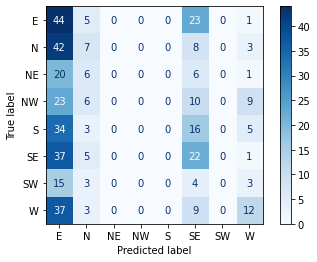

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_scaled, y_test, cmap="Blues")
plt.show()

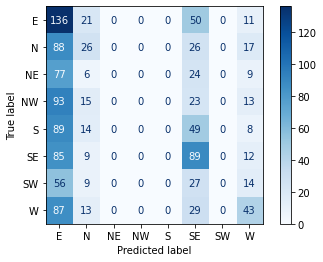

In [50]:
plot_confusion_matrix(model, X_train_scaled, y_train, cmap="Blues")
plt.show()

In [48]:
plt.savefig('../static/images/clrep_train_svm.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.savefig('books_read.png')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["E", "N", "NE", "NW", "S", "SE", "SW", "W"]))

              precision    recall  f1-score   support

           E       0.17      0.60      0.27        73
           N       0.18      0.12      0.14        60
          NE       0.00      0.00      0.00        33
          NW       0.00      0.00      0.00        48
           S       0.00      0.00      0.00        58
          SE       0.22      0.34      0.27        65
          SW       0.00      0.00      0.00        25
           W       0.34      0.20      0.25        61

    accuracy                           0.20       423
   macro avg       0.12      0.16      0.12       423
weighted avg       0.14      0.20      0.14       423



In [39]:
joblib.dump(model, 'cyclone_SVM.smd')
print("Model is saved.")

Model is saved.


In [40]:
joblib.dump(model, '../cyclone_SVM.smd')
print("Model is saved.")

Model is saved.
